# Entrenando un algoritmo de Machine Learning para predecir la contaminación en Beijing

## Integrantes:
- Juan Diego Londoño
- Mario Alejandro Saldarriaga

## [Dataset](https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data):
Tenemos un dataset con **43824 Muestras** referentes a las partículas por millón (PM 2.5) presentes en el aire de Beijing, China por hora entre los años 2010 y 2014 y con **12 Características**:

### Características:
- No: Fila
- Año
- Mes
- Dia
- Hora
- PM 2.5: Concentración de partículas por millón (PM2.5), medida en $ug/m^3$
- DEWP: Punto de rocío, medido en °F
- TEMP: Temperatura media en °F
- PRES: Preción atmosférica, medida en hPa (unidades de presión)
- cbwd: Dirección del viendo combinada
- Iws: Velocidad del viento acumulada medida en m/s
- Is: Horas de nieve acumuladas
- Ir: Horas de lluvia acumuladas

# Librerías a utilizar:
- Pandas: ``` pip install pandas ```
- Numpy: ``` pip install numpy ```
- Seaborn: ``` pip install seaborn ```
- Matplotlib Pyplot: ``` pip install matplotlib ```

# Importamos estas librerías y archivos a nuestro código:
- Configuraremos las tablas de pandas quitando la limitación del ancho de columna
- Importamos el dataset, llamado data.csv y lo asignaremos a una variable llamada df_pol
- Eliminaremos la columna que nos indica el número de fila, aquí no la necesitamos

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_colwidth', None)

df_pol = pd.read_csv("data.csv", sep=",")
del df_pol["No"]

# Primer paso: Preprocesamiento de los datos:
Vamos a analizar todos los datos presentes en nuestro archivo, eliminaremos los que no necesitamos y los ajustaremos de modo que podamos hacer predicciones más precisas

## Información del dataset:
Lo primero que haremos será obtener la información más relevante y echarle un pequeño vistazo a la tabla

In [4]:
print("Número de características: {}".format(df_pol.shape[1]))
print("Número de muestras {}\n".format(df_pol.shape[0]))

Número de características: 12
Número de muestras 43824



In [5]:
print("Datos nulos por característica:")
df_pol.isnull().sum()

Datos nulos por característica:


year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [6]:
df_pol.head(10)

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
5,2010,1,1,5,NaN,-19,-10.0,1017.0,NW,16.10,0,0
6,2010,1,1,6,NaN,-19,-9.0,1017.0,NW,19.23,0,0
7,2010,1,1,7,NaN,-19,-9.0,1017.0,NW,21.02,0,0
8,2010,1,1,8,NaN,-19,-9.0,1017.0,NW,24.15,0,0
9,2010,1,1,9,NaN,-20,-8.0,1017.0,NW,27.28,0,0


Podemos observar que en la característica pm2.5 tenemos 2067 datos faltantes (NaN), esto es bajo comparado con los 43824 datos. Sin embargo no podemos dejarlos así.

Analicemos ahora las estadísticas de nuestro dataframe:

In [7]:
df_pol.describe()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


## Datos nulos:

Vamos a reemplazar los datos nulos con la media aritmética de los datos. Esto lo haremos así:

In [8]:
pm25_MEAN =  df_pol['pm2.5'].mean()
pm25_MEAN = round(pm25_MEAN)
print("Media de PM 2.5: {}".format(pm25_MEAN))
df_pol['pm2.5'].fillna(pm25_MEAN, inplace = True)

df_pol.head(10)

Media de PM 2.5: 99


,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010,1,1,0,99.0,-21,-11.0,1021.0,NW,1.79,0,0
1,2010,1,1,1,99.0,-21,-12.0,1020.0,NW,4.92,0,0
2,2010,1,1,2,99.0,-21,-11.0,1019.0,NW,6.71,0,0
3,2010,1,1,3,99.0,-21,-14.0,1019.0,NW,9.84,0,0
4,2010,1,1,4,99.0,-20,-12.0,1018.0,NW,12.97,0,0
5,2010,1,1,5,99.0,-19,-10.0,1017.0,NW,16.10,0,0
6,2010,1,1,6,99.0,-19,-9.0,1017.0,NW,19.23,0,0
7,2010,1,1,7,99.0,-19,-9.0,1017.0,NW,21.02,0,0
8,2010,1,1,8,99.0,-19,-9.0,1017.0,NW,24.15,0,0
9,2010,1,1,9,99.0,-20,-8.0,1017.0,NW,27.28,0,0


Podemos comprobar ahora que no existen datos nulos en nuestro dataset:

In [9]:
df_pol.isna().any()

year     False
month    False
day      False
hour     False
pm2.5    False
DEWP     False
TEMP     False
PRES     False
cbwd     False
Iws      False
Is       False
Ir       False
dtype: bool

## Datos categóricos:
Tenemos un dato categórico como lo es la dirección del viento, consideramos que en términos de polución, esta variable es importante, por lo que vamos a codificarla para trabajar con ella

### Dirección combinada del viento (cbwd)

In [10]:
print("Primero analizamos qué categorías tenemos: ")
df_pol.cbwd.value_counts()

Primero analizamos qué categorías tenemos: 


SE    15290
NW    14150
cv     9387
NE     4997
Name: cbwd, dtype: int64

**CV** no es un punto cardinal, investigando obtuvimos que cv es un valor **errado** en traducción, y que corresponde a la dirección SW, vamos a corregirlo rápidamente:

In [11]:
df_pol['cbwd'].replace('cv', 'SW', inplace = True)
df_pol.cbwd.value_counts()

SE    15290
NW    14150
SW     9387
NE     4997
Name: cbwd, dtype: int64

Debemos codificar estos datos, puesto que nuestro algoritmo necesita trabajar con números. Vemos que estos son datos Nominales, esto quiere decir que no tienen una jerarquía, sería problemático para nuestro algoritmo asignarle valores (1,2,3,4) a cada dirección del viento. Es por esto que es preferible usar variables *Dummie* y tratar estos datos como binarios, de este modo obtendremos predicciones más precisas al ejecutar el algoritmo de machine learning.

Al crear estas variables e insertarlas en nuestra tabla, eliminaremos la variable cbwd, e ingresaremos 3 columnas ¿Por qué 3? Podemos eliminar una de ellas y asumir que esta será la ausencia de las otras, así no saturamos la tabla con muchas columnas nuevas.

Para esto utilizaremos ``` pd.get_dummies ``` y le daremos ``` drop_first = True ``` para eliminar la primera columna, es decir, nuestra variable NE significará que las demás están en cero.

In [12]:
dummies = pd.get_dummies(df_pol['cbwd'], drop_first=True)
dummies.head(40000)

,NW,SE,SW
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
39995,0,0,0
39996,0,0,1
39997,0,1,0
39998,0,1,0


Hecho esto, procedemos a descartar la columna cbdw de nuestro dataframe y le daremos por otro lado las columnas NW, SE y SW que serán binarias.

In [13]:
df_pol = df_pol.drop(['cbwd'], axis=1)
df_pol = pd.concat([df_pol, dummies], axis=1)

print("Demos un vistazo ahora a nuestro dataframe: ")
df_pol.head(10)

Demos un vistazo ahora a nuestro dataframe: 


,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,NW,SE,SW
0,2010,1,1,0,99.0,-21,-11.0,1021.0,1.79,0,0,1,0,0
1,2010,1,1,1,99.0,-21,-12.0,1020.0,4.92,0,0,1,0,0
2,2010,1,1,2,99.0,-21,-11.0,1019.0,6.71,0,0,1,0,0
3,2010,1,1,3,99.0,-21,-14.0,1019.0,9.84,0,0,1,0,0
4,2010,1,1,4,99.0,-20,-12.0,1018.0,12.97,0,0,1,0,0
5,2010,1,1,5,99.0,-19,-10.0,1017.0,16.10,0,0,1,0,0
6,2010,1,1,6,99.0,-19,-9.0,1017.0,19.23,0,0,1,0,0
7,2010,1,1,7,99.0,-19,-9.0,1017.0,21.02,0,0,1,0,0
8,2010,1,1,8,99.0,-19,-9.0,1017.0,24.15,0,0,1,0,0
9,2010,1,1,9,99.0,-20,-8.0,1017.0,27.28,0,0,1,0,0


## Estadísticas de cada característica:
Obtendremos la cuenta, media, mínimos, máximos y otra información relevante sobre nuestros datos

In [14]:
df_pol.describe()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,NW,SE,SW
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,2012.000000,6.523549,15.727820,11.500000,98.631458,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916,0.322882,0.348896,0.214198
std,1.413842,3.448572,8.799425,6.922266,89.853333,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867,0.467584,0.476626,0.410269
min,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,4.000000,8.000000,5.750000,31.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2012.000000,7.000000,16.000000,11.500000,77.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2013.000000,10.000000,23.000000,17.250000,132.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000,1.000000,1.000000,0.000000
max,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000,1.000000,1.000000,1.000000


## Gráficos por variable

Analizaremos diagramas de cajas y bigotes por cada característica, esto nos permitirá seleccionar los datos atípicos y decidir qué hacer con ellos:

<AxesSubplot:>

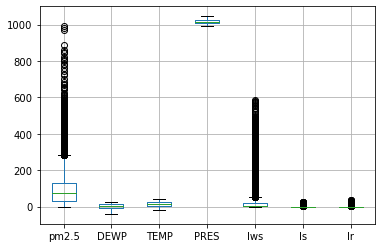

In [15]:
df_pol.boxplot(['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir'])

Podemos ver que el punto de rocío, la temperatura y la presión no tienen datos atípicos, mientras pm2.5, Iws, Is e Ir sí los poseen

## Eliminando datos atípicos:

Lo primero es que según parece, almenos durante este período, la lluvia y la nieve han estado bastante ausentes, esto causa que todo lo diferente a cero se convierta casi automáticamente en valor atípico. Por lo que vamos a eliminar estas variables.

Posteriormente calcularemos los cuartiles, el rango intercuartil y eliminaremos los datos fuera de este rango.

Numero de muestras despues de limpieza: 36939


<AxesSubplot:>

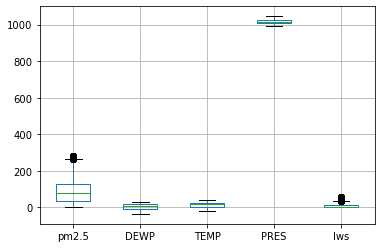

In [16]:
df_pol.drop(['Is', 'Ir'], axis=1, inplace=True)
limpiar = ['pm2.5','Iws']
for i in limpiar:
    per25 = df_pol[i].quantile(0.25)
    per75 = df_pol[i].quantile(0.75)
    IQR = per75 - per25
    UpperLimit = per75 + 1.5*IQR
    LowerLimit = per25 - 1.5*IQR
    df_pol = df_pol.loc[(df_pol[i] < UpperLimit) & (df_pol[i] > LowerLimit)]

print("Numero de muestras despues de limpieza: {}".format(df_pol.shape[0]))

df_pol.boxplot(['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws'])


In [17]:
df_pol.describe()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,NW,SE,SW
count,36939.000000,36939.000000,36939.000000,36939.000000,36939.000000,36939.000000,36939.000000,36939.000000,36939.000000,36939.000000,36939.000000,36939.000000
mean,2012.027721,6.548607,15.628198,11.402826,90.735402,3.435042,13.569073,1015.627792,10.407721,0.267739,0.373318,0.234034
std,1.410894,3.293943,8.827606,6.842219,65.156476,14.095901,12.138083,10.165692,12.605617,0.442787,0.483692,0.423400
min,2010.000000,1.000000,1.000000,0.000000,1.000000,-36.000000,-18.000000,991.000000,0.450000,0.000000,0.000000,0.000000
25%,2011.000000,4.000000,8.000000,6.000000,37.000000,-9.000000,3.000000,1007.000000,1.790000,0.000000,0.000000,0.000000
50%,2012.000000,7.000000,16.000000,11.000000,80.000000,5.000000,16.000000,1015.000000,4.450000,0.000000,0.000000,0.000000
75%,2013.000000,9.000000,23.000000,17.000000,127.000000,16.000000,24.000000,1024.000000,14.750000,1.000000,1.000000,0.000000
max,2014.000000,12.000000,31.000000,23.000000,283.000000,28.000000,42.000000,1046.000000,55.430000,1.000000,1.000000,1.000000


## Normalizando nuestros datos:
Tenemos nuestros datos en diferentes unidades de medida, vamos a normalizar nuestra información para lograr una predicción más precisa y una lectura grafica más sencilla.

In [18]:
df_pol = df_pol.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_pol.head(40000)

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,NW,SE,SW
0,0.0,0.0,0.000000,0.000000,0.347518,0.234375,0.116667,0.545455,0.024372,1.0,0.0,0.0
1,0.0,0.0,0.000000,0.043478,0.347518,0.234375,0.100000,0.527273,0.081302,1.0,0.0,0.0
2,0.0,0.0,0.000000,0.086957,0.347518,0.234375,0.116667,0.509091,0.113860,1.0,0.0,0.0
3,0.0,0.0,0.000000,0.130435,0.347518,0.234375,0.066667,0.509091,0.170789,1.0,0.0,0.0
4,0.0,0.0,0.000000,0.173913,0.347518,0.250000,0.100000,0.490909,0.227719,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
43796,1.0,1.0,0.966667,0.869565,0.088652,0.390625,0.383333,0.563636,0.227537,1.0,0.0,0.0
43797,1.0,1.0,0.966667,0.913043,0.067376,0.375000,0.366667,0.581818,0.390142,1.0,0.0,0.0
43798,1.0,1.0,0.966667,0.956522,0.024823,0.234375,0.333333,0.618182,0.568934,1.0,0.0,0.0
43799,1.0,1.0,0.966667,1.000000,0.053191,0.218750,0.300000,0.636364,0.698981,1.0,0.0,0.0


<AxesSubplot:>

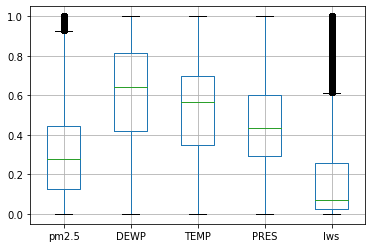

In [19]:
df_pol.boxplot(['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws'])


## Analizando correlaciones:

Vamos a analizar la correlación entre las características, una correlación mayor a 80% no indicaría que hay una relación entre las variables y que podemos eliminar una de ellas.
Para esto usaremos el metodo corr de pandas, que nos devuelve una matriz de correlación y le daremos un fondo gradiente, con esto nos será más fácil ver con los colores más oscuros las variables que tienen una mayor correlación. De las variables con correlaciones cercanas o mayores al 80% elegiremos algunas para eliminar.

In [20]:
corr = df_pol.corr()
corr.style.background_gradient(cmap='coolwarm' , axis=None)

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,NW,SE,SW
year,1.000000,-0.002038,-0.005824,0.001488,-0.066630,-0.008830,0.044769,-0.010276,-0.028832,-0.039875,0.011890,0.021724
month,-0.002038,1.000000,0.013522,0.000183,0.006961,0.267743,0.188418,-0.068792,-0.092091,0.024265,-0.065492,0.057774
day,-0.005824,0.013522,1.000000,-0.000170,0.063105,0.031018,0.017638,-0.001535,-0.000883,-0.012030,0.011433,0.003812
hour,0.001488,0.000183,-0.000170,1.000000,-0.018316,-0.007514,0.166439,-0.049506,0.141461,-0.171058,0.252194,-0.055448
pm2.5,-0.066630,0.006961,0.063105,-0.018316,1.000000,0.178353,-0.050988,-0.076949,-0.158699,-0.171131,0.110058,0.119432
DEWP,-0.008830,0.267743,0.031018,-0.007514,0.178353,1.000000,0.830038,-0.779163,-0.063714,-0.230267,0.219208,0.046949
TEMP,0.044769,0.188418,0.017638,0.166439,-0.050988,0.830038,1.000000,-0.822045,0.065613,-0.225427,0.287598,-0.027354
PRES,-0.010276,-0.068792,-0.001535,-0.049506,-0.076949,-0.779163,-0.822045,1.000000,-0.026821,0.168171,-0.215559,0.002983
Iws,-0.028832,-0.092091,-0.000883,0.141461,-0.158699,-0.063714,0.065613,-0.026821,1.000000,0.148948,0.271229,-0.372191
NW,-0.039875,0.024265,-0.012030,-0.171058,-0.171131,-0.230267,-0.225427,0.168171,0.148948,1.000000,-0.466701,-0.334240


Podemos ver que hay relaciones bastante fuertes entre:
- Temperatura y Presión Atmosférica
- Punto de rocío y Presión Atmosférica
- Temperatura y Punto de rocío

Las demás variables están en un rango que podríamos considerar normal, por lo que de las ya vistas, podemos eliminar algunas.
En este caso vamos a eliminar las variables:
- Punto de rocío
- Presión Atmosférica

Puesto que consideramos la temperatura como la variable más significativa entre las 3.

In [21]:
df_pol.drop(['DEWP', 'PRES'], axis=1, inplace=True)

Hecho esto podremos ver que el mapa de calor tiene una apariencia más uniforme y que la correlación de entre las variables no supera el 46%.

## Visualizando nuestro dataset ya procesado:

### Mapa de calor:

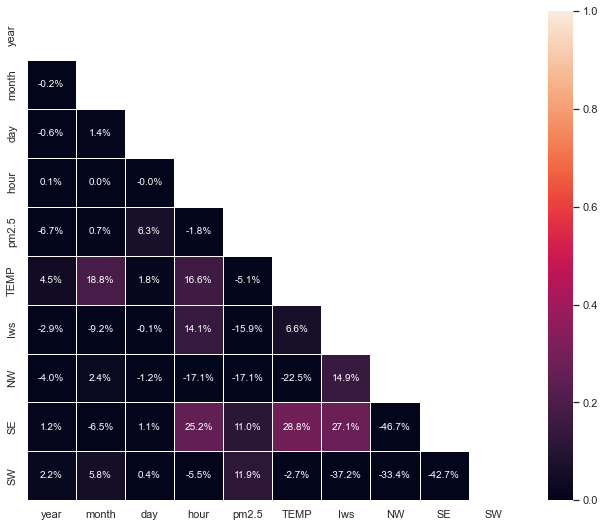

In [35]:
sns.set(style="whitegrid", context="notebook")
corr = df_pol.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
ax = sns.heatmap(corr, annot=True, fmt=".1%", annot_kws={"fontsize":10}, linewidths=.5, mask = mask, vmax=1, vmin = 0)

### Cajas y bigotes

<AxesSubplot:>

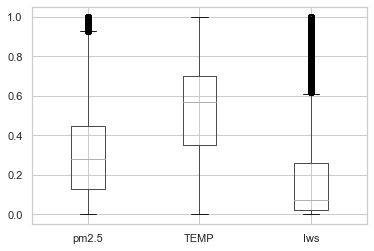

In [23]:
df_pol.boxplot(['pm2.5', 'TEMP', 'Iws'])

### Vistazo al dataset:
Hechos todos los ajustes necesarios, vamos a visualizar nuestro dataset ya procesado y listo para ser usado por nuestro algoritmo.

Hemos terminado con **36939** muestras y **8** características (Recordemos que las últimas 3 son dummies de la velocidad del viento).

In [24]:
df_pol.head(40000)

,year,month,day,hour,pm2.5,TEMP,Iws,NW,SE,SW
0,0.0,0.0,0.000000,0.000000,0.347518,0.116667,0.024372,1.0,0.0,0.0
1,0.0,0.0,0.000000,0.043478,0.347518,0.100000,0.081302,1.0,0.0,0.0
2,0.0,0.0,0.000000,0.086957,0.347518,0.116667,0.113860,1.0,0.0,0.0
3,0.0,0.0,0.000000,0.130435,0.347518,0.066667,0.170789,1.0,0.0,0.0
4,0.0,0.0,0.000000,0.173913,0.347518,0.100000,0.227719,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
43796,1.0,1.0,0.966667,0.869565,0.088652,0.383333,0.227537,1.0,0.0,0.0
43797,1.0,1.0,0.966667,0.913043,0.067376,0.366667,0.390142,1.0,0.0,0.0
43798,1.0,1.0,0.966667,0.956522,0.024823,0.333333,0.568934,1.0,0.0,0.0
43799,1.0,1.0,0.966667,1.000000,0.053191,0.300000,0.698981,1.0,0.0,0.0


### Exportamos el dataset:

In [25]:
df_pol.to_csv('dataset_limpio.csv', index=False)